In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset

In [10]:
data = pd.read_csv(r"C:\Users\Rushikesh\Downloads\Jobs_NYC_Postings.csv")

In [11]:
data

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,570670,DEPT OF HEALTH/MENTAL HYGIENE,External,1,Public Health Nurse III / Communicable Disease...,PUBLIC HEALTH NURSE,Competitive-1,51011,03,Constituent Services & Community Programs Health,...,"**Must follow all safety, security, Blood-born...",Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City Residency is not required for th...,01/24/2023,NaN,11/16/2023,03/04/2024
5116,552517,DEPARTMENT OF TRANSPORTATION,External,1,Engineer-In-Charge,CIVIL ENGINEER,Competitive-1,20215,02,"Engineering, Architecture, & Planning",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,35 Hours,55 Water St Ny Ny,NaN,New York City Residency is not required for th...,09/23/2022,NaN,09/29/2022,03/04/2024
5117,567353,DEPARTMENT OF CORRECTION,External,8,"Assistant Commissioner, Facility Operations",FACILITY SUPERVISOR (CORRECTIO,Non-Competitive-5,95090,M4,"Public Safety, Inspections, & Enforcement",...,The City of New York offers a comprehensive be...,For City employees: Go to Employee Self-Servic...,NaN,NaN,NaN,New York City residency is generally required ...,01/05/2023,NaN,01/26/2023,03/04/2024
5118,612424,BRONX DISTRICT ATTORNEY,Internal,1,Human Trafficking Victim's Advocate,COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,Constituent Services & Community Programs Heal...,...,NaN,"For City employees, to complete your applicati...",NaN,NaN,NaN,City Residency is not required for this position,10/20/2023,19-OCT-2024,10/20/2023,03/04/2024


In [12]:
data.count()

Job ID                           5120
Agency                           5120
Posting Type                     5120
# Of Positions                   5120
Business Title                   5120
Civil Service Title              5120
Title Classification             5120
Title Code No                    5120
Level                            5120
Job Category                     5120
Full-Time/Part-Time indicator    5003
Career Level                     5120
Salary Range From                5120
Salary Range To                  5120
Salary Frequency                 5120
Work Location                    5120
Division/Work Unit               5120
Job Description                  5120
Minimum Qual Requirements        5077
Preferred Skills                 3901
Additional Information           3258
To Apply                         4694
Hours/Shift                      1910
Work Location 1                  1891
Recruitment Contact                 0
Residency Requirement            5120
Posting Date

# Display first few rows

In [13]:
display(data.head())


,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


# Data Preprocessing

In [14]:
columns_to_drop = ["Job ID", "Agency", "Posting Type", "To Apply", "Recruitment Contact", "Posting Date", "Post Until", "Posting Updated", "Process Date"]
data.drop(columns=columns_to_drop, inplace=True)

# Handling missing values

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   # Of Positions                 5120 non-null   int64  
 1   Business Title                 5120 non-null   object 
 2   Civil Service Title            5120 non-null   object 
 3   Title Classification           5120 non-null   object 
 4   Title Code No                  5120 non-null   object 
 5   Level                          5120 non-null   object 
 6   Job Category                   5120 non-null   object 
 7   Full-Time/Part-Time indicator  5003 non-null   object 
 8   Career Level                   5120 non-null   object 
 9   Salary Range From              5120 non-null   float64
 10  Salary Range To                5120 non-null   float64
 11  Salary Frequency               5120 non-null   object 
 12  Work Location                  5120 non-null   o

In [16]:
missing_values = data.isnull().sum()
print("Missing Values Count:\n", missing_values)


Missing Values Count:
 # Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator     117
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          43
Preferred Skills                 1219
Additional Information           1862
Hours/Shift                      3210
Work Location 1                  3229
Residency Requirement               0
dtype: int64


# Forward fill for missing values

In [17]:
data = data.fillna(method='ffill')

C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_11956\917065080.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [18]:
missing_values = data.isnull().sum()
print("Missing Values Count:\n", missing_values)

Missing Values Count:
 # Of Positions                   0
Business Title                   0
Civil Service Title              0
Title Classification             0
Title Code No                    0
Level                            0
Job Category                     0
Full-Time/Part-Time indicator    0
Career Level                     0
Salary Range From                0
Salary Range To                  0
Salary Frequency                 0
Work Location                    0
Division/Work Unit               0
Job Description                  0
Minimum Qual Requirements        0
Preferred Skills                 0
Additional Information           0
Hours/Shift                      1
Work Location 1                  1
Residency Requirement            0
dtype: int64


# Violin Plot of Salary by Career Level

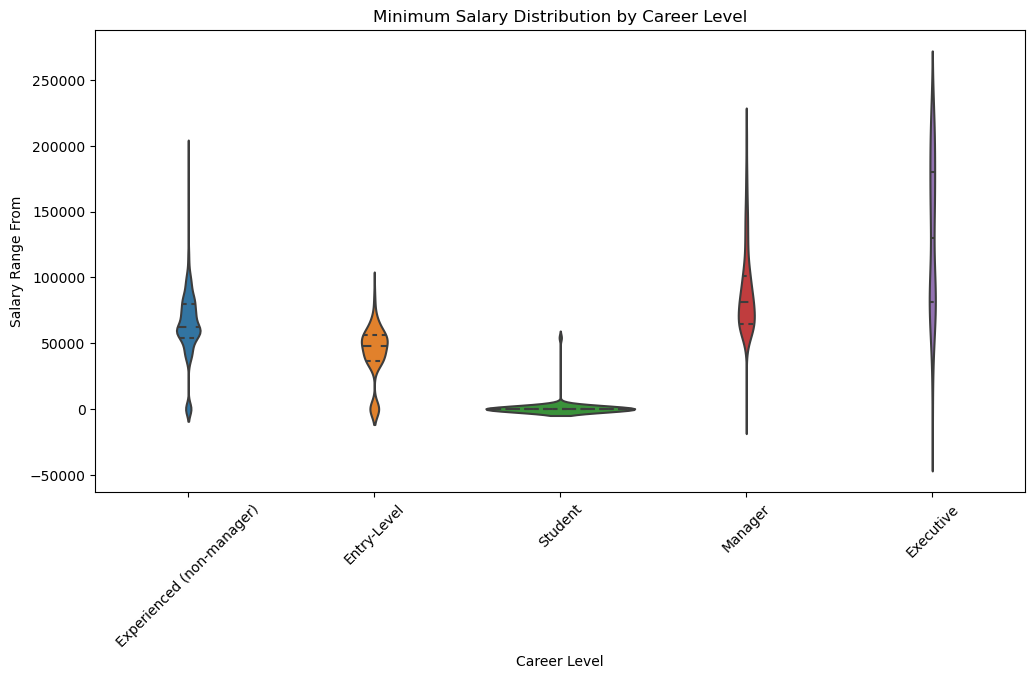

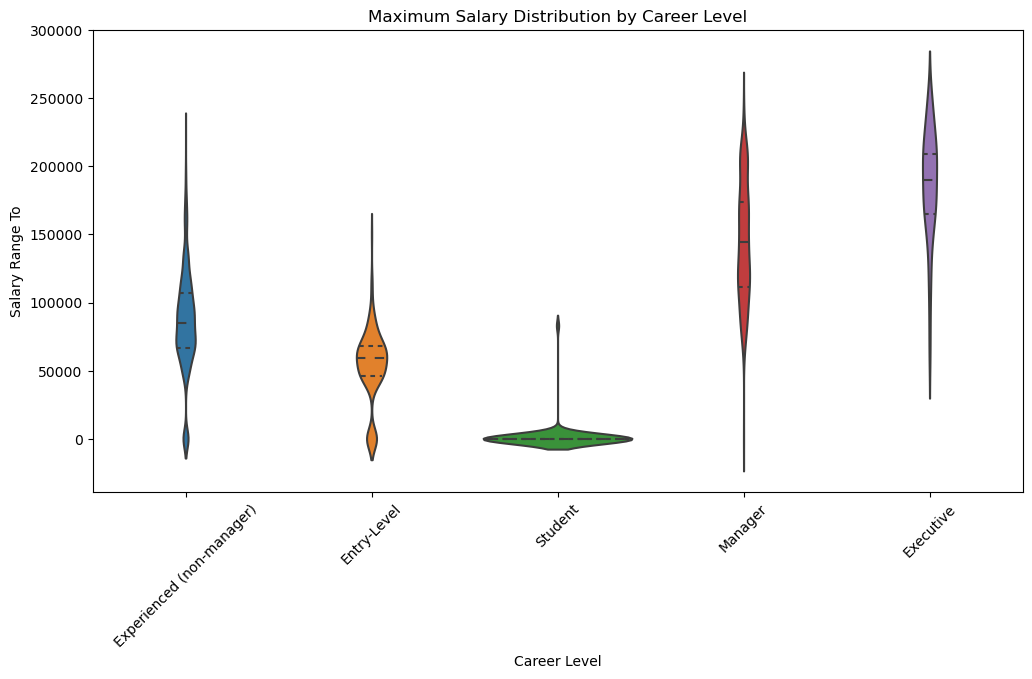

In [19]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Career Level", y="Salary Range From", data=data, inner="quartile")
plt.title("Minimum Salary Distribution by Career Level")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x="Career Level", y="Salary Range To", data=data, inner="quartile")
plt.title("Maximum Salary Distribution by Career Level")
plt.xticks(rotation=45)
plt.show()


# Pairplot for Numeric Features

C:\Users\Rushikesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rushikesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rushikesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


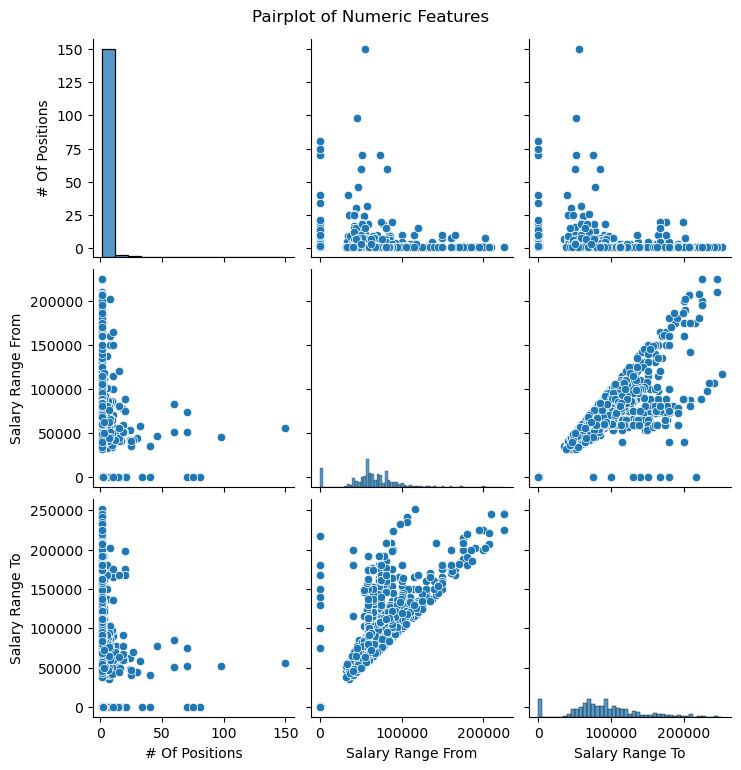

In [20]:
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


# Detecting and Removing Outliers using IQR

In [21]:
numeric_cols = data.select_dtypes(include=['number']).columns
Q1 = data.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = data.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))
data.loc[:, numeric_cols] = data[numeric_cols].mask(outlier_mask, np.nan)

# Plot Outliers

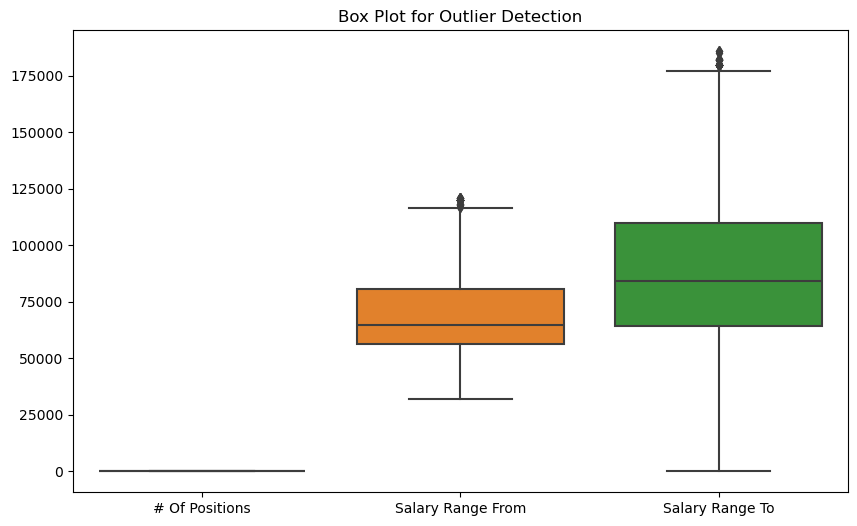

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title("Box Plot for Outlier Detection")
plt.show()

# Replacing Outliers with Median

In [23]:
data[outlier_mask] = np.nan  # Replace outliers with NaN
data.fillna(data.median(numeric_only=True), inplace=True)

# Plot Outliers After Removal

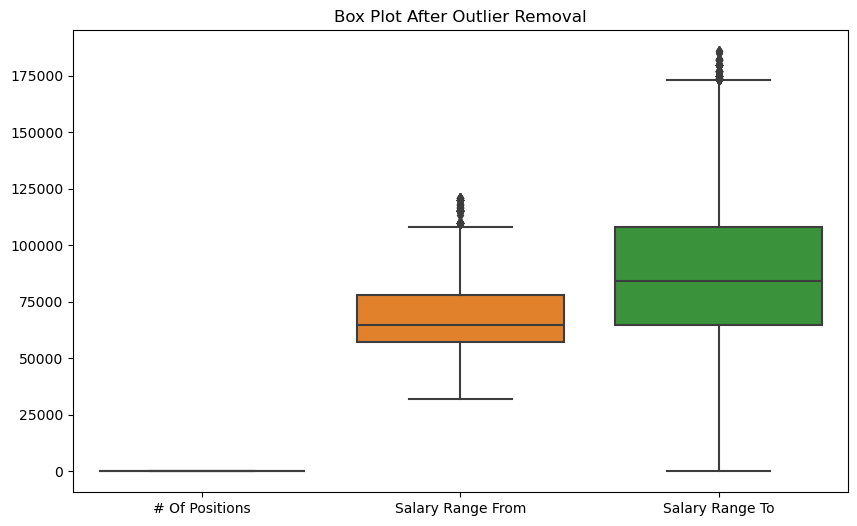

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title("Box Plot After Outlier Removal")
plt.show()

# Handle categorical variables

In [25]:
categorical_columns = ["Business Title", "Civil Service Title", "Job Category", "Work Location", "Division/Work Unit", "Career Level", "Salary Frequency"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Ensure all values are strings before encoding
    label_encoders[col] = le




# Splitting features and target variables

In [26]:
X = data.drop(columns=["Salary Range From", "Salary Range To"])
y_min = pd.to_numeric(data["Salary Range From"], errors='coerce')
y_max = pd.to_numeric(data["Salary Range To"], errors='coerce')


# Handle any NaN values in target variables

In [27]:
y_min.fillna(y_min.median(), inplace=True)
y_max.fillna(y_max.median(), inplace=True)

# Convert all features to numerical

In [28]:
dummy_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=dummy_columns)

# Train-test split

In [29]:
X_train, X_test, y_train_min, y_test_min = train_test_split(X, y_min, test_size=0.2, random_state=42)
_, _, y_train_max, y_test_max = train_test_split(X, y_max, test_size=0.2, random_state=42)


# Scaling features

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training

In [31]:
model_min = RandomForestRegressor(n_estimators=100, random_state=42)
model_max = RandomForestRegressor(n_estimators=100, random_state=42)


In [32]:
model_min.fit(X_train, y_train_min)
model_max.fit(X_train, y_train_max)


RandomForestRegressor(random_state=42)

# Predictions

In [33]:
y_pred_min = model_min.predict(X_test)
y_pred_max = model_max.predict(X_test)


In [34]:
# Evaluation Metrics
print("## Minimum Salary Prediction Metrics")
print("- MAE:", mean_absolute_error(y_test_min, y_pred_min))
print("- MSE:", mean_squared_error(y_test_min, y_pred_min))
print("- R2 Score:", r2_score(y_test_min, y_pred_min))

print("\n## Maximum Salary Prediction Metrics")
print("- MAE:", mean_absolute_error(y_test_max, y_pred_max))
print("- MSE:", mean_squared_error(y_test_max, y_pred_max))
print("- R2 Score:", r2_score(y_test_max, y_pred_max))

## Minimum Salary Prediction Metrics
- MAE: 2659.2932625558033
- MSE: 29959948.594449956
- R2 Score: 0.8841957366708028

## Maximum Salary Prediction Metrics
- MAE: 5510.2786264999995
- MSE: 94173471.3135862
- R2 Score: 0.9416931534892747


# Data visualization

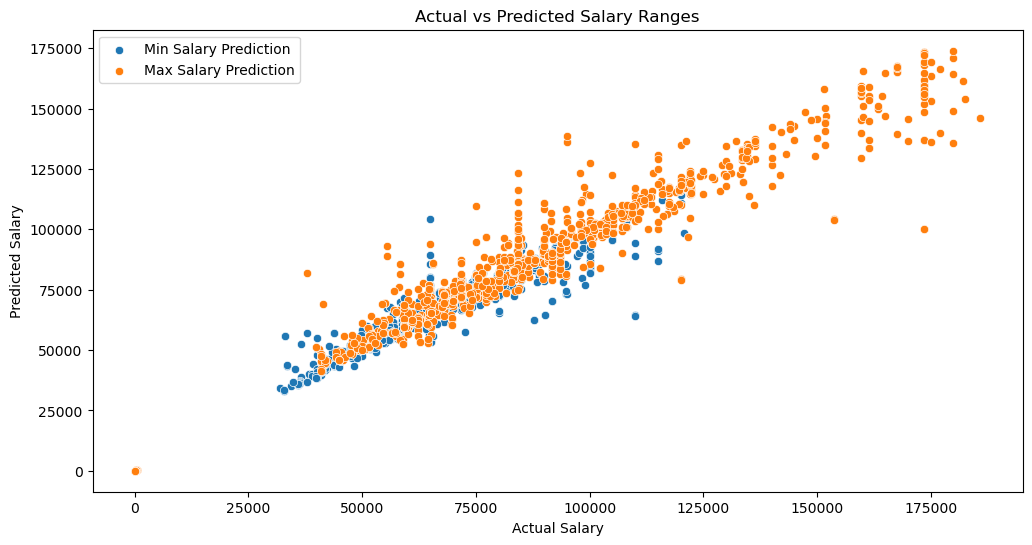

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test_min, y=y_pred_min, label="Min Salary Prediction")
sns.scatterplot(x=y_test_max, y=y_pred_max, label="Max Salary Prediction")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.legend()
plt.title("Actual vs Predicted Salary Ranges")
plt.show()

# Distribution of Salary Ranges

C:\Users\Rushikesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rushikesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


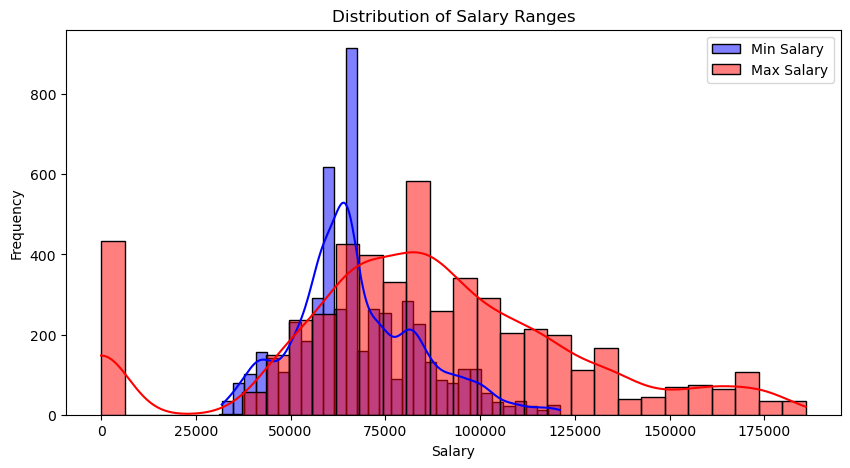

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(y_min, bins=30, kde=True, color='blue', label='Min Salary')
sns.histplot(y_max, bins=30, kde=True, color='red', label='Max Salary')
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Salary Ranges")
plt.show()


# Correlation Heatmap

C:\Users\Rushikesh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


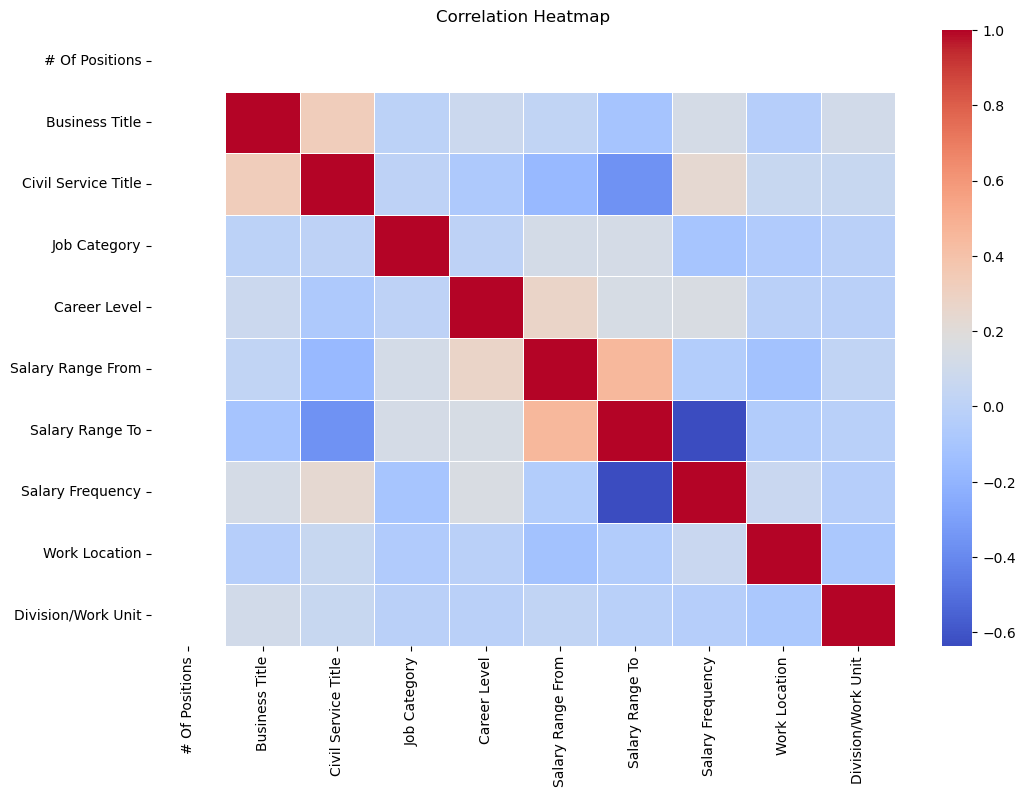

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()